In [10]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import pandas as pd

pokedex = pd.read_csv('pokemon.csv')
pokedex

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [11]:
#sns.pairplot(pokedex, hue='isLegendary', palette="deep")

In [12]:
lista = list(zip(pokedex.against_bug, pokedex.against_dark, pokedex.against_dragon, pokedex.against_electric, pokedex.against_fairy, 
                 pokedex.against_fight, pokedex.against_fire, pokedex.against_flying, pokedex.against_ghost, pokedex.against_grass, 
                 pokedex.against_ground, pokedex.against_ice, pokedex.against_normal, pokedex.against_poison, pokedex.against_psychic, 
                 pokedex.against_rock, pokedex.against_steel, pokedex.against_water))

VeD = [list(item) for item in lista]

In [13]:
tipo1 = pokedex.type1
encoder = LabelEncoder()
tipo1 = encoder.fit_transform(tipo1)

In [14]:
padronizado = StandardScaler()
entrada_padronizada = padronizado.fit_transform(VeD)

pca = PCA(n_components=2)
duas_dimensoes = pca.fit_transform(VeD)
duas_dimensoes

array([[-1.45577192, -0.35427967],
       [-1.45577192, -0.35427967],
       [-1.45577192, -0.35427967],
       ...,
       [-0.26567667, -2.17444328],
       [-0.10206668, -0.07391654],
       [ 0.96713856,  0.39104124]])

In [20]:
pca.components_

array([[-8.79363040e-02, -4.25727489e-03, -2.72237029e-02,
        -1.30815419e-02, -5.58882345e-02,  3.05303342e-01,
        -3.16789785e-01, -3.51692992e-01, -2.15385079e-02,
         4.09919807e-01,  4.56067503e-01, -3.33362021e-01,
        -6.35087627e-02, -2.48904308e-01, -5.03267742e-02,
        -2.44137580e-01, -1.77989519e-02,  2.34294791e-01],
       [-3.73055321e-01,  8.76150354e-02, -5.93702234e-02,
         4.98695436e-01, -2.59127499e-01, -3.28990043e-01,
        -1.66590193e-01, -1.02985022e-01,  1.05618436e-01,
        -1.38350480e-01, -8.28299207e-03, -3.31458548e-01,
        -2.04030260e-02, -1.24046643e-01,  1.04486357e-01,
         4.42117977e-01, -1.57392925e-01, -2.80712691e-04]])

In [24]:
colunas_escolhidas = np.argsort(np.abs(pca.components_), axis=1)[:, -2:]
colunas_escolhidas_nomes = np.array(pokedex.columns)[colunas_escolhidas]
print("Colunas escolhidas pelo PCA (nomes):", colunas_escolhidas_nomes)

Colunas escolhidas pelo PCA (nomes): [['against_ghost' 'against_grass']
 ['against_psychic' 'against_dragon']]


Text(0, 0.5, 'inertia')

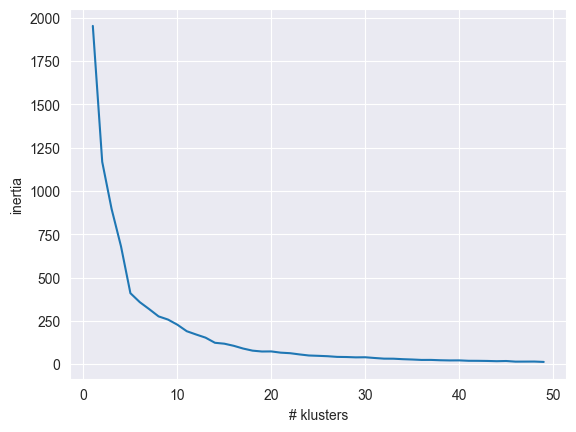

In [16]:
inertia=[]
for i in range(1,50):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(duas_dimensoes)
    inertia.append(kmeans.inertia_)

plt.plot(list(range(1,50)), inertia)
plt.xlabel("# klusters")
plt.ylabel("inertia")

Text(0.5, 1.0, 'Dataset real')

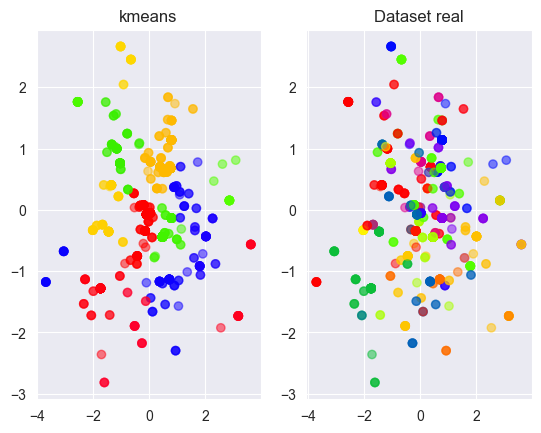

In [22]:
kmeans = KMeans(n_clusters=15, n_init='auto')
kmeans.fit(duas_dimensoes)
solucao = kmeans.predict(duas_dimensoes)

plt.subplot(1,2,1)
plt.scatter(duas_dimensoes[:,0], duas_dimensoes[:,1], c=solucao, alpha=0.5, cmap='prism')
plt.title("kmeans")

plt.subplot(1,2,2)
plt.scatter(duas_dimensoes[:,0], duas_dimensoes[:,1], c=tipo1, alpha=0.5, cmap='prism') # arrumar para tipos
plt.title("Dataset real")